In [2]:
import numpy as np
import torch
from torch.autograd import Variable
import torch.optim as optim
from scipy.stats import unitary_group
import matplotlib.pyplot as plt
from quimb import *
from quimb.tensor import *
import sympy as sym

import scipy as sp
from scipy import linalg

from JC_functions import *

Recall that stochastic matrix for the Jaynes-Cummings chain parameterized by $\theta$:
# Stochastic Matrix M:

$$ \begin{align} 
    M_{mn}(\theta) = [\big(\cos{\theta\sqrt{n+1}}\cos{\theta\sqrt{n}}\big)^2 &+ \big(\sin{\theta\sqrt{n+1}}\big)^4]\delta_{mn}\\  + \big(\cos{\theta\sqrt{n+1}}&\sin{\theta\sqrt{n}})^2\delta_{m,n-1} \\ &+ \big(\cos{\theta\sqrt{n+1}}\sin{\theta\sqrt{n+1}})^2\delta_{m,n+1}
\end{align}$$

Let's use this to work out the entanglement of the chain for certain paramater values: $\theta = \frac{\pi}{2}\gamma, \sqrt{\pi}/7$ and compare them (along with Motzkin chain)

In [2]:
theta_gr, theta_pi, p = [np.pi*(1+np.sqrt(5))/2, np.sqrt(np.pi)/3, .333333]

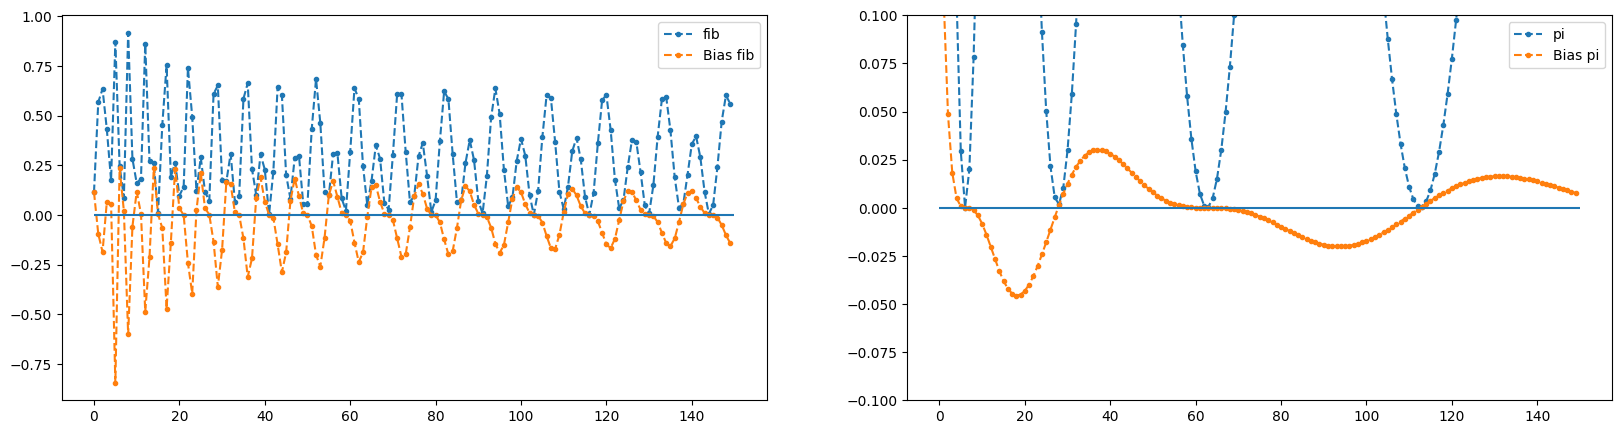

In [8]:
#define 3 relevant parameters
#theta_gr, theta_pi, p = [np.pi*(1+np.sqrt(5))/4, np.sqrt(np.pi)/5, .333333]

N=150
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,5))
Sfib, Spi = [[1-Hop_prob(n,theta_gr)[1] for n in range(N)],[1-Hop_prob(n,theta_pi)[1] for n in range(N)]]
Biasfib, Biaspi = [[Hop_prob(n,theta_gr)[2]-Hop_prob(n,theta_gr)[0] for n in range(N)],[Hop_prob(n,theta_pi)[2]-Hop_prob(n,theta_pi)[0] for n in range(N)]]

ax1.plot(Sfib,'.--', label = 'fib')
ax1.plot(Biasfib,'.--', label = 'Bias fib')
ax1.hlines(0, 0, N)
ax2.plot(Spi,'.--', label = 'pi')
ax2.plot(Biaspi,'.--', label = 'Bias pi')
ax2.hlines(0,0,N)
ax2.set_ylim(-.1,.1)

ax1.legend()
ax2.legend()


For the moment we will only use the stochastic matrices: 
* Use M_JC and M_randwalk in JC_functions.py
* Use Schmidt_weights and SE_fromM

In [4]:
chi = 250

M_gr, M_pi, M_motz = [M_JC(chi, theta_gr), M_JC(chi, theta_pi), M_randwalk(chi, p)]

In [5]:
L_range = np.array([50, 200, 2000])

M_gr_dict, M_pi_dict, M_motz_dict = [{},{},{}]

for Lmax in L_range:
    L_data = np.arange(5,int(Lmax-2), int(Lmax/40))
    
    
    M_gr_dict[Lmax] = [L_data, [SE_fromM([M_gr for i in range(Lmax)], l) for l in L_data]]
    M_pi_dict[Lmax] = [L_data, [SE_fromM([M_pi for i in range(Lmax)], l) for l in L_data]]
    M_motz_dict[Lmax] = [L_data, [SE_fromM([M_motz for i in range(Lmax)], l) for l in L_data]]
    

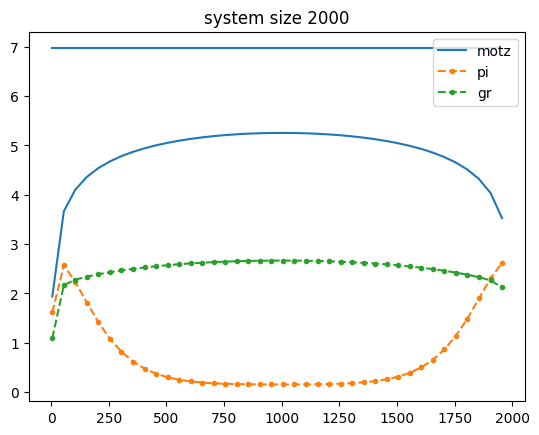

In [6]:
n = -1

plt.plot(M_motz_dict[L_range[n]][0], M_motz_dict[L_range[n]][1], label='motz')
plt.plot(M_pi_dict[L_range[n]][0], M_pi_dict[L_range[n]][1],'.--', label = 'pi')
plt.plot(M_gr_dict[L_range[n]][0], M_gr_dict[L_range[n]][1],'.--', label = 'gr')
plt.hlines(np.log(chi/2)/np.log(2), 0 , M_pi_dict[L_range[n]][0][-1])
#plt.xscale('log')
#plt.yscale('log')
plt.title(f'system size {L_range[n]}')
plt.legend()

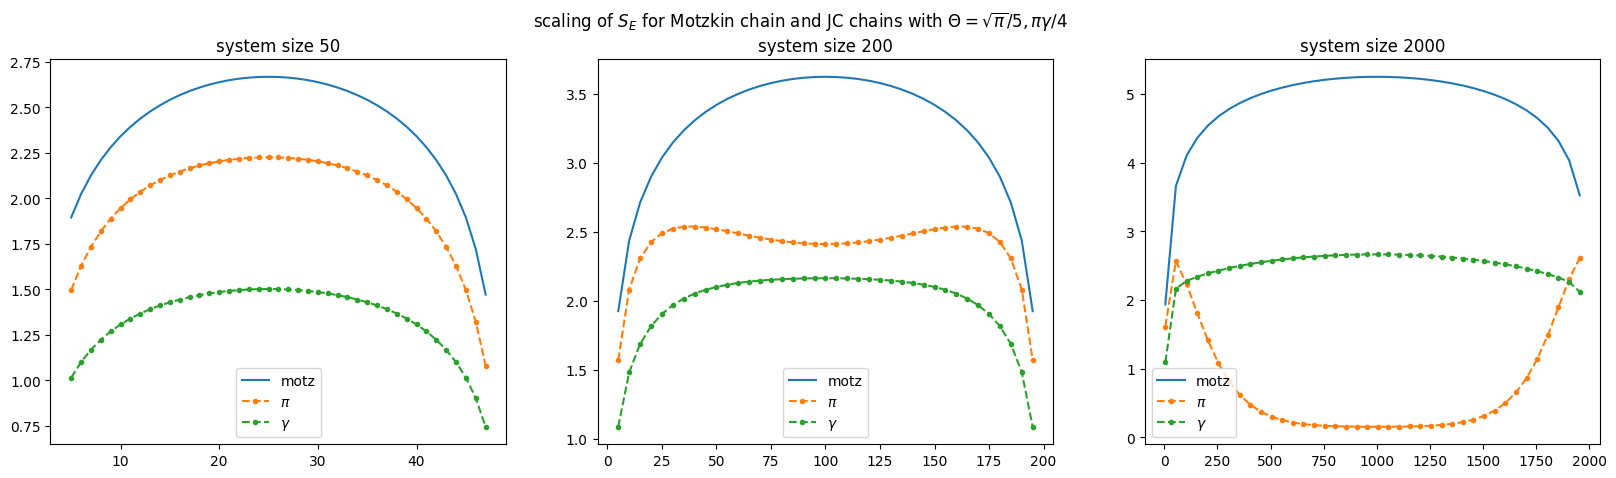

In [7]:
fig, axes =plt.subplots(1,len(L_range), figsize = (20,5), label = 'Hello')

for n in range(len(L_range)):
    axes[n].plot(M_motz_dict[L_range[n]][0], M_motz_dict[L_range[n]][1], label='motz')
    axes[n].plot(M_pi_dict[L_range[n]][0], M_pi_dict[L_range[n]][1],'.--', label = '$\pi$')
    axes[n].plot(M_gr_dict[L_range[n]][0], M_gr_dict[L_range[n]][1],'.--', label = '$\gamma$')
    axes[n].set_title(f'system size {L_range[n]}')
    axes[n].legend()


fig.suptitle('scaling of $S_E$ for Motzkin chain and JC chains with $ \Theta = \sqrt{\pi}/5, \pi \gamma/4$')
plt.show()

# Meta stability

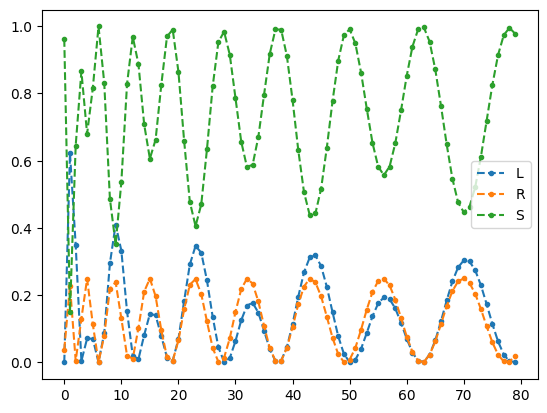

In [3]:
theta_trapped = np.sqrt(np.pi)

L, S, R = [[], [],[]]
for n in range(80):
    P = Hop_prob(n,theta_trapped)
    L.append(P[0])
    S.append(P[1])
    R.append(P[2])

plt.plot(L, '--.', label = 'L')
plt.plot(R, '--.', label = 'R')
plt.plot(S, '--.', label = 'S')
plt.legend()

In [4]:
L_max0, L_max1 = [10**3, 3*10**2]
L_data0, L_data1 = [range(10, L_max0, int(L_max0/40)), range(10, L_max1, int(L_max1/20))]

SE_data0 = [L_data0, [SE_fromM([M_JC(70, theta_trapped) for i in range(L_max0)], l) for l in L_data0]]
SE_data1 = [L_data1, [SE_fromM([M_JC(70, theta_trapped) for i in range(L_max1)], l) for l in L_data1]]


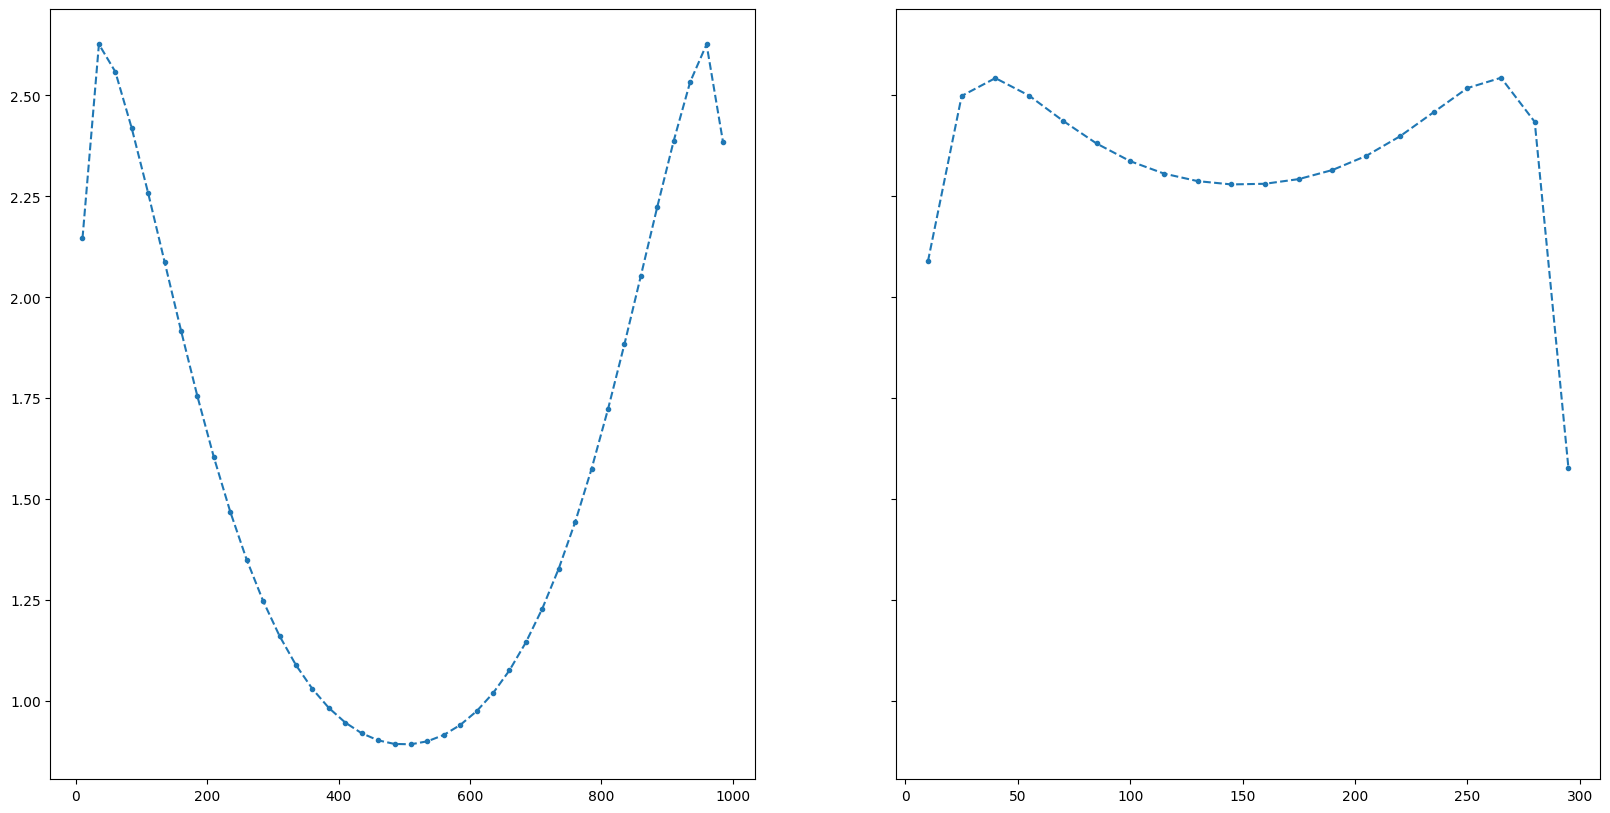

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10), sharey=True)

ax1.plot(SE_data0[0], SE_data0[1], '.--')
ax2.plot(SE_data1[0], SE_data1[1], '.--')

### Random dynamics

In [18]:
theta = .1*np.pi*(np.random.random(10**5))
theta_normal = .1*np.pi*(np.abs(np.random.randn(10**5)))


In [38]:
N_max = 100
Hop_uniform = [Hop_prob(n, theta) for n in range(N_max)]
Hop_normal = [Hop_prob(n, theta_normal) for n in range(N_max)]

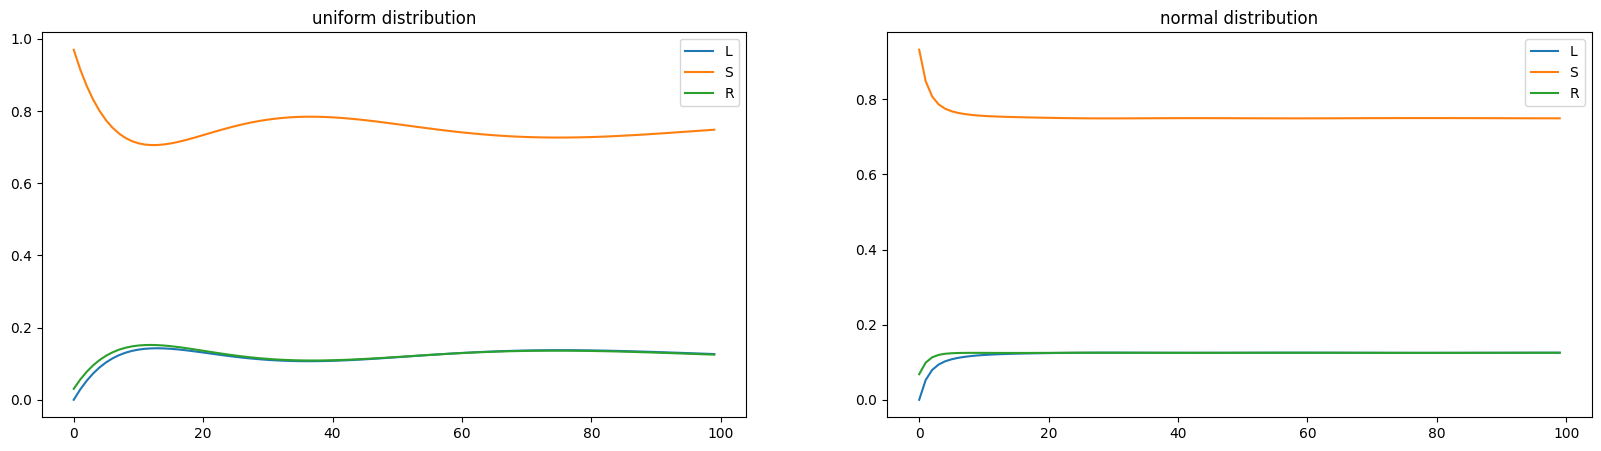

In [39]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,5))
ax1.plot([Hop_uniform[n][0].mean() for n in range(N_max)], label = 'L')
ax1.plot([Hop_uniform[n][1].mean() for n in range(N_max)], label = 'S')
ax1.plot([Hop_uniform[n][2].mean() for n in range(N_max)], label = 'R')
ax1.set_title('uniform distribution')
ax1.legend()

ax2.plot([Hop_normal[n][0].mean() for n in range(N_max)], label = 'L')
ax2.plot([Hop_normal[n][1].mean() for n in range(N_max)], label = 'S')
ax2.plot([Hop_normal[n][2].mean() for n in range(N_max)], label = 'R')
ax2.set_title('normal distribution')
ax2.legend()

plt.show()

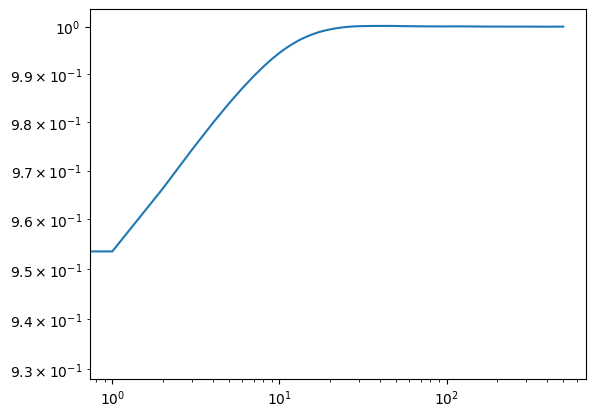

In [93]:
plt.plot([1-(Hop_normal[n][2].mean()-Hop_normal[n][0].mean()) for n in range(N_max)])
plt.xscale('log')
plt.yscale('log')

In [94]:
M_averaged = np.zeros((chi,chi))

for n in range(chi):

    M_averaged[n, n] = Hop_normal[n][1].mean()
    
    if n > 0:
        M_averaged[n-1,n] = Hop_normal[n][0].mean()
    if n < chi-1:
        M_averaged[n+1,n] = Hop_normal[n][2].mean()
    
#modify M[chi-1,chi-1] so that sum of chi'th column =1
    M_averaged[-1,-1] += 1- M_averaged[:,chi-1].sum()



### Lets compute the average entanglement entropy for $\theta$ chosen from some distribution

In [95]:
L, chi, runs = [600,20,10**3]
l = np.arange(5,L-4, int(L/40))
SE_matrix = np.zeros((runs, l.size))

for run in range(runs):
    M_list = [M_JC(chi,.1*np.pi*(np.abs(np.random.randn(1)))) for n in range(L)]
    for r in range(l.size):
        SE_matrix[run, r] = SE_fromM(M_list, l[r])



    

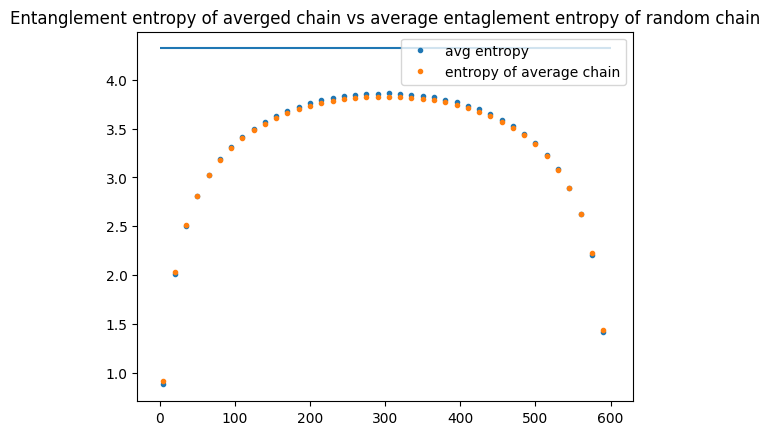

In [ ]:
plt.plot(l,SE_matrix.mean(axis=0),'.', label = 'avg entropy')
plt.plot(l, [SE_fromM([M_averaged for n in range(L)], r) for r in l],'.', label = "entropy of average chain")
plt.hlines(np.log(chi)/np.log(2),0, L)
plt.title('Entanglement entropy of averged chain vs average entaglement entropy of random chain')
plt.legend()
plt.show()

# Correlation functions of averaged system
Recall:
\begin{align}
&U: \ket{0}\otimes \ket{n} \to \cos(t\sqrt{n+1})\ket{0}\otimes \ket{n} + i\sin(t\sqrt{n+1})\ket{1}\otimes \ket{n+1} \\
& U: \ket{1}\otimes \ket{n} \to \cos(t\sqrt{n})\ket{1}\otimes \ket{n} + i\sin(t\sqrt{n})\ket{0} \otimes \ket{n-1}
\end{align}

this gives us the recipe for the two site unit cell tensor:

In [9]:
def JC_tensors_avg(chi, t): #makes U above as a 4 tensor
    A0, A1, B0, B1 = [np.zeros((chi,chi), dtype = complex), np.zeros((chi,chi),dtype = complex), np.zeros((chi,chi),dtype = complex),np.zeros((chi,chi),dtype = complex)] 

    for n in range(chi-1):
        B1[n,n] = np.abs(np.cos(t*np.sqrt(n)))
        A1[n,n+1] = np.abs(np.sin(t*np.sqrt(n+1)))

        B0[n+1,n] = np.abs(np.sin(t*np.sqrt(n+1)))
        A0[n,n] = np.abs(np.cos(t*np.sqrt(n+1)))

    B1[-1,-1] = np.abs(np.cos(t*np.sqrt(chi-1)))
    B0[-1,-2] = np.abs(np.sin(t*np.sqrt(chi-1)))#this may be wrong

    A1[-2,-1] = np.abs(np.sin(t*np.sqrt(chi-1)))
    A0[-1,-1] = np.abs(np.cos(t*np.sqrt(chi)))
    # need to adjust bottom right corner of B0 and A1 further to make rotor-like unitary

    U = np.zeros((2,2,chi,chi), dtype = complex) #Tensor U_ijnm (2,2,chi,chi)
    U[0,0], U[1,0], U[0,1], U[1,1] = [A0, 1j*A1, 1j*B0, B1]

    return U #this is correct aside from lower block


#Use this function to form JC MPS
def MPS_JC_avg(chi,t): # makes MPS for 2 site unit cell
    U = JC_tensors_avg(chi,t)
    A0,A1,B0,B1 = [U[0,0], U[1,0], U[0,1], U[1,1]] # standard single site MPS tensors

    C = np.zeros((4,chi,chi), dtype = complex) #0 = 00, 1 = 01, 2 = 10, 3 = 11
    C[0], C[1], C[2], C[3] = [np.einsum('ij,jk', A0, B0), np.einsum('ij,jk', A0, B1), np.einsum('ij,jk', A1, B0), np.einsum('ij,jk', A1, B1)]

    return C

In [6]:
chi1 = 18
A_rand = np.array([MPS_JC_avg(chi1,.1*np.pi*(np.abs(np.random.randn(1)))) for n in range(10**3)])
A_avg = A_rand.mean(axis=0)

In [16]:
A_avg[0,:,:]

array([[0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ,
        0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ,
        0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ,
        0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ,
        0.+0.j        , 0.+0.j        ],
       [0.+0.19576456j, 0.+0.j        , 0.+0.j        , 0.+0.j        ,
        0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ,
        0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ,
        0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ,
        0.+0.j        , 0.+0.j        ],
       [0.+0.j        , 0.+0.24632522j, 0.+0.j        , 0.+0.j        ,
        0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ,
        0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ,
        0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ,
        0.+0.j        , 0.+0.j        ],
       [0.+0.

In [7]:
L = 20

BL = np.zeros((2, chi1, chi1))
BL[0,0,0] = 1

MPS_avg_list = [A_avg for l in range(L)]
MPS_avg_list.insert(0, BL)
MPS_avg_list.append(BL)

MPS_avg = MatrixProductState(MPS_avg_list, shape = 'plr')
MPS_avg.cyclic = False
MPS_avg.normalize()


(0.20420618178645067+0j)

In [8]:
Z_A, Z_B = [np.kron(pauli('Z'), np.eye(2)), np.kron(np.eye(2),pauli('Z'))]
X_A, X_B = [np.kron(pauli('X'), np.eye(2)), np.kron(np.eye(2),pauli('X'))]

corr_sites = np.array([4,10]).tolist()

ZZ_avg_data = [np.real(MPS_avg.correlation(Z_A+Z_B,1 , i)) for i in corr_sites]

ZZ_avg_data

[-0.006003071410283832, -0.0027307146283619107]

In [55]:
import time
t0 = time.time()
runs = 5*10**2

M_ZZ = np.zeros((runs, len(corr_sites)))

for r in range(runs):
    temp_mps_list = [BL]
    theta_temp =.1*np.pi*(np.abs(np.random.randn(1))) #ensemble of chains with set theta
    for l in range(L):
        #theta_temp =.1*np.pi*(np.abs(np.random.randn(1))) #ensabmle of chains with random theta at each site
        temp_mps_list.append(MPS_JC_2site(chi1, theta_temp))
    
    temp_mps_list.append(BL)

    temp_mps = MatrixProductState(temp_mps_list, shape = 'plr')
    temp_mps.cyclic = False
    temp_mps.normalize()

    if r%int(runs/10) ==0:
        print(f'just finished run {r} at time {time.time()- t0}')

    for i in range(len(corr_sites)):
        M_ZZ[r,i] = np.real(temp_mps.correlation(Z_A + Z_B, 1, corr_sites[i]))

just finished run 0 at time 0.18211984634399414
just finished run 50 at time 43.06292915344238
just finished run 100 at time 87.07417917251587
just finished run 150 at time 130.69999527931213
just finished run 200 at time 174.08153915405273
just finished run 250 at time 216.6524510383606
just finished run 300 at time 259.36549615859985
just finished run 350 at time 301.8566629886627
just finished run 400 at time 345.18472695350647
just finished run 450 at time 392.29325103759766


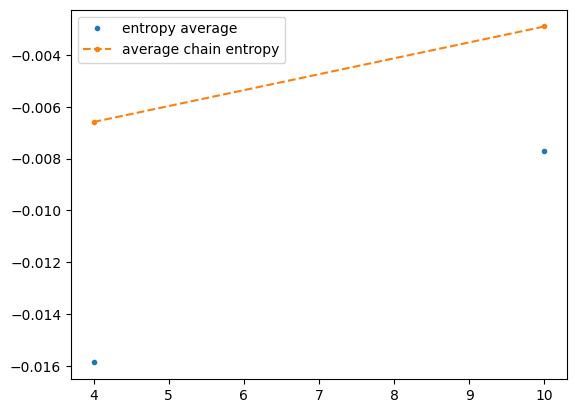

In [56]:
plt.plot(corr_sites,M_ZZ.mean(axis=0), '.', label = 'entropy average')
plt.plot(corr_sites, ZZ_avg_data, '.--', label = 'average chain entropy')
plt.legend()

In [57]:
M_ZZ.mean(axis=0)

array([-0.0158721 , -0.00770127])

In [25]:
def L(n,t):
    return np.sin(t*np.sqrt(n))* np.cos(t*np.sqrt(n+1))

def R(n,t):
    return 1j* np.sin(t*np.sqrt(n+1))* np.cos(t*np.sqrt(n+1))

def S(n,t):
    return np.cos(t*np.sqrt(n+1))* np.cos(t*np.sqrt(n))

def S_swap(n,t):
    return -np.sin(t*np.sqrt(n+1))* np.sin(t*np.sqrt(n))

def norm_2site(t):
    return np.abs(R(0,t)*L(1,t))**2 + (np.abs(S_swap(0,t))**2 + np.abs(S(0,t))**2)* (np.abs(S_swap(0,t))**2 + np.abs(S(0,t))**2)
